**prototyping**

In [ ]:
import json
import requests
import re
from collections import Counter

json_url = "https://huggingface.co/datasets/liuhaotian/LLaVA-Instruct-150K/resolve/main/llava_v1_5_mix665k.json"

object_classes = ["person", "car", "dog", "cat", "tree", "house", "chair", "laptop", "phone", "bottle",
                  "building", "road", "sign", "book", "cup", "table", "bike", "bus", "truck", "flower",
                  "horse", "snow", "train", "giraffe", "street", "trailer", "bear", "bed", "desk"]

def extract_objects(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    return [word for word in words if word in object_classes]

print("Downloading dataset...")
response = requests.get(json_url)
if response.status_code == 200:
    json_data = response.json()
else:
    print(f"Failed to fetch JSON. HTTP Status Code: {response.status_code}")
    exit()

object_counter = Counter()
print("Processing dataset...")

for item in json_data:
    for convo in item.get("conversations", []):
        if convo.get("from") == "gpt":
            caption = convo.get("value", "")
            print(f"Extracted Caption: {caption}")
            objects = extract_objects(caption)
            object_counter.update(objects)

# results
print("\nTop 20 Objects in LLaVA-v1.5-mix-665K Dataset:\n")
for obj, count in object_counter.most_common(20):
    print(f"{obj}: {count}")


Streaming output truncated to the last 5000 lines.
* The proposed platform has a huge potential market size, as music lovers are always looking for better ways to connect and interact with each other.
* The integration with Spotify's API and its features will provide a huge advantage to the platform.
* There is a high demand for personalized features, such as AI-powered recommendation systems, voice bots, and playlist generators.
* The user interface and ease of use were identified as key factors in the success of the platform.

E. Challenges and Assumptions considered for the project study:

* The platform's success will be highly dependent on the availability, scalability, and security of Spotify's API.
* The platform will face intense competition from existing music-based social platforms.
* The development cost and time required for the platform will be significant.
* The platform will comply with Spotify's terms of service and developer agreement while using their API and data.

F

**llava_object_frequency_analysis**


Loading dataset...

Processing dataset (this may take a few minutes)...

Top 50 Objects in LLaVA-v1.5-mix-665K Dataset:

table: 46990
person: 46110
street: 31303
dog: 27052
building: 25558
train: 24180
sign: 23678
cat: 22180
chair: 21352
car: 20973
bus: 20123
road: 17579
window: 17316
tree: 16980
horse: 16585
bed: 15999
snow: 15237
bear: 15034
phone: 14672
giraffe: 14301
truck: 14236
clock: 13403
computer: 12589
laptop: 12343
desk: 11268
book: 10604
hat: 10539
toilet: 9216
sink: 8358
glasses: 8043
bottle: 7777
bike: 7662
door: 7413
cup: 7184
shelf: 6688
keyboard: 6397
mirror: 6171
oven: 6130
television: 5926
refrigerator: 5891
house: 5198
stove: 4588
cabinet: 4560
mouse: 3970
flower: 3823
river: 3679
microwave: 3634
lamp: 3320
bridge: 3089
sofa: 2999


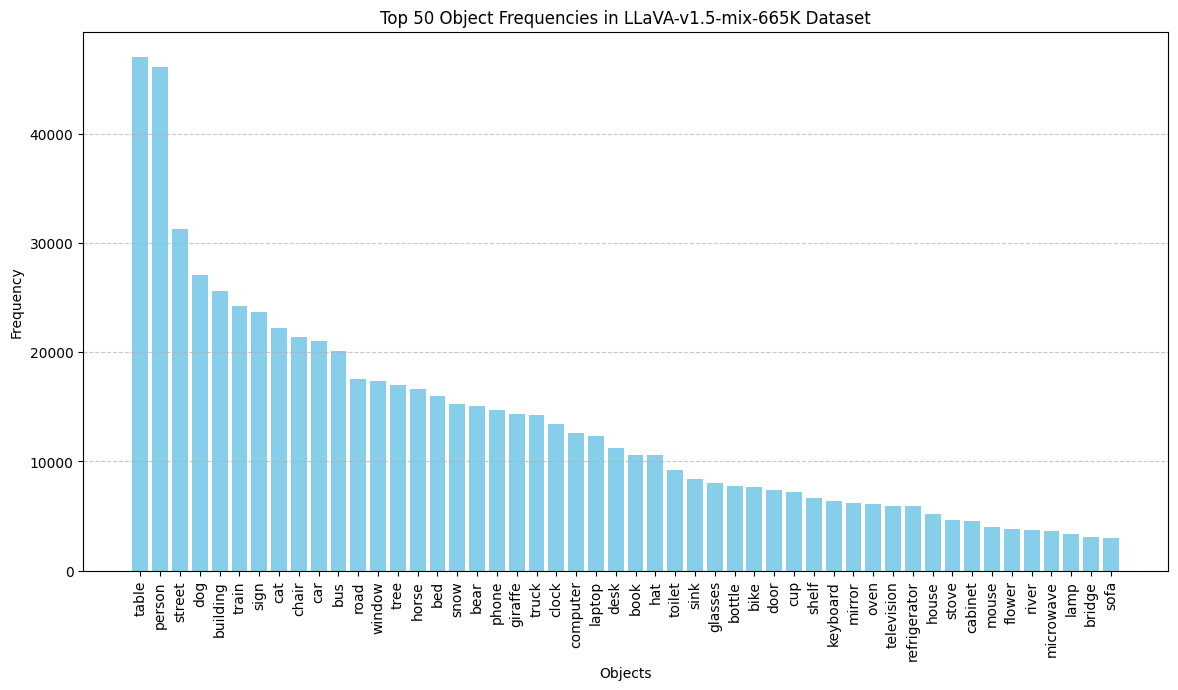


 Analysis complete! Download your Excel file here:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import json
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os
from google.colab import files

# dataset URL and local path
json_url = "https://huggingface.co/datasets/liuhaotian/LLaVA-Instruct-150K/resolve/main/llava_v1_5_mix665k.json"
json_file_path = "/content/llava_v1_5_mix665k.json"

if not os.path.exists(json_file_path):
    print("Downloading dataset (approx. 1GB)...")
    response = requests.get(json_url)
    if response.status_code == 200:
        with open(json_file_path, "wb") as f:
            f.write(response.content)
        print("Download complete!")
    else:
        raise Exception(f"Failed to fetch JSON. HTTP Status Code: {response.status_code}")

print("\nLoading dataset...")
with open(json_file_path, "r", encoding="utf-8") as f:
    json_data = json.load(f)

# Defining object classes to track
object_classes = set([
    "person", "car", "dog", "cat", "tree", "house", "chair", "laptop", "phone", "bottle",
    "building", "road", "sign", "book", "cup", "table", "bike", "bus", "truck", "flower",
    "horse", "snow", "train", "giraffe", "street", "trailer", "bear", "bed", "desk",
    "window", "computer", "glasses", "hat", "keyboard", "mouse", "bridge", "river", "door",
    "lamp", "mirror", "painting", "television", "sofa", "stairs", "cabinet", "shelf",
    "clock", "cushion", "bathtub", "toilet", "sink", "refrigerator", "microwave", "oven", "stove"
])

# Function to extract objects from text
def extract_objects(text):
    words = set(re.findall(r'\b[a-zA-Z]+\b', text.lower()))
    return words.intersection(object_classes)

# Step 4: Process JSON and extract object frequencies
print("\nProcessing dataset (this may take a few minutes)...")
object_counter = Counter()

for item in json_data:
    for convo in item.get("conversations", []):
        if convo.get("from") == "gpt":
            caption = convo.get("value", "")
            objects = extract_objects(caption)
            object_counter.update(objects)

df_objects = pd.DataFrame(object_counter.items(), columns=["Object", "Frequency"])
df_objects = df_objects.sort_values(by="Frequency", ascending=False)

excel_path = "/content/LLaVA_v1.5_Class_Distribution.xlsx"
df_objects.to_excel(excel_path, index=False)

print("\nTop 50 Objects in LLaVA-v1.5-mix-665K Dataset:\n")
for obj, count in df_objects.values[:50]:
    print(f"{obj}: {count}")

# Plot visualization
plt.figure(figsize=(14, 7))
plt.bar(df_objects["Object"][:50], df_objects["Frequency"][:50], color="skyblue")
plt.xlabel("Objects")
plt.ylabel("Frequency")
plt.title("Top 50 Object Frequencies in LLaVA-v1.5-mix-665K Dataset")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

print("\n Analysis complete! Download your Excel file here:")
files.download(excel_path)


**Plot visualization**


Loading dataset...

Processing dataset (this may take a few minutes)...

Top 50 Words in LLaVA-v1.5-mix-665K Dataset:

the: 2884230
a: 1511861
and: 1445035
to: 1023772
of: 985386
in: 832657
is: 617621
on: 477937
or: 445941
for: 396014
yes: 351685
no: 347491
with: 345697
are: 316424
that: 308560
as: 295931
be: 276984
can: 276921
it: 271900
s: 206984
this: 199051
their: 198958
image: 185326
an: 169824
you: 136599
by: 131717
from: 127113
they: 125163
white: 120376
there: 116744
which: 114375
man: 109529
such: 109414
other: 103919
also: 96772
your: 96314
people: 95733
at: 93262
have: 91069
right: 88081
while: 85143
could: 85108
left: 84984
more: 82624
may: 82355
black: 77520
these: 77231
might: 76183
one: 75277
some: 70772


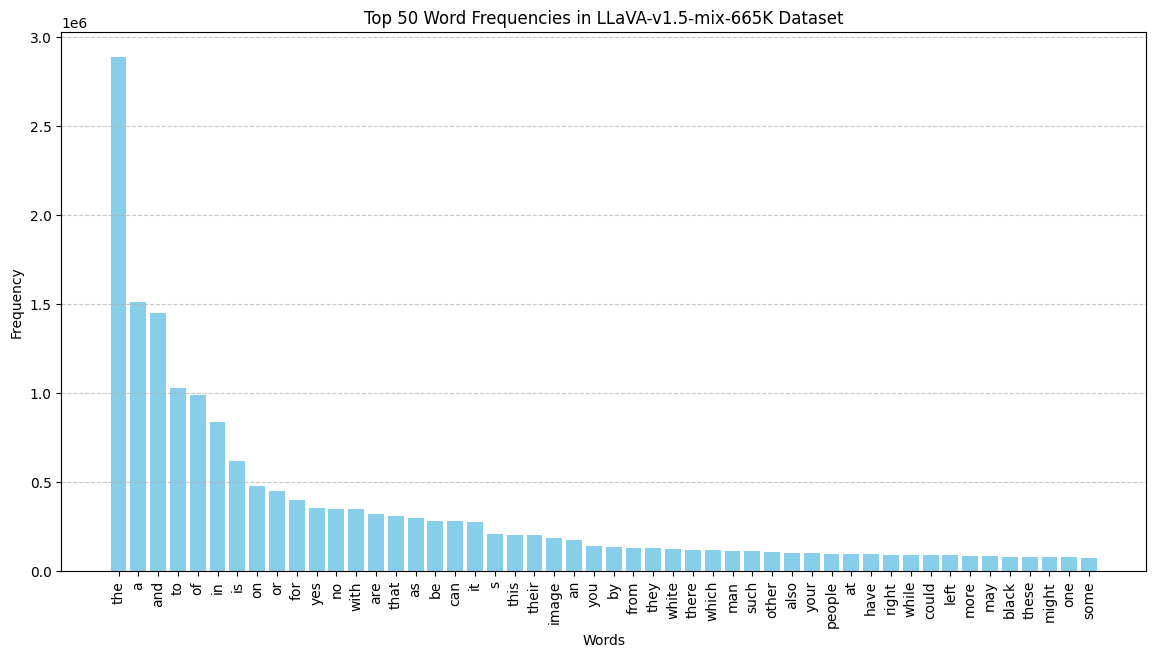


✅ Analysis complete! Download your CSV file here:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import json
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os
from google.colab import files

# dataset URL and local path
json_url = "https://huggingface.co/datasets/liuhaotian/LLaVA-Instruct-150K/resolve/main/llava_v1_5_mix665k.json"
json_file_path = "/content/llava_v1_5_mix665k.json"

# Downloading dataset
if not os.path.exists(json_file_path):
    print("Downloading dataset (approx. 1GB)...")
    response = requests.get(json_url)
    if response.status_code == 200:
        with open(json_file_path, "wb") as f:
            f.write(response.content)
        print("Download complete!")
    else:
        raise Exception(f"Failed to fetch JSON. HTTP Status Code: {response.status_code}")

print("\nLoading dataset...")
with open(json_file_path, "r", encoding="utf-8") as f:
    json_data = json.load(f)

# Extraction step
print("\nProcessing dataset (this may take a few minutes)...")
word_counter = Counter()

for item in json_data:
    for convo in item.get("conversations", []):
        if convo.get("from") == "gpt":
            caption = convo.get("value", "").lower()
            words = re.findall(r'\b[a-zA-Z]+\b', caption)
            word_counter.update(words)

df_words = pd.DataFrame(word_counter.items(), columns=["Word", "Frequency"])
df_words = df_words.sort_values(by="Frequency", ascending=False)

csv_path = "/content/LLaVA_v1.5_Word_Frequencies.csv"
df_words.to_csv(csv_path, index=False)

# Top 50 Words
print("\nTop 50 Words in LLaVA-v1.5-mix-665K Dataset:\n")
for word, count in df_words.values[:50]:
    print(f"{word}: {count}")

# Plot visualization
plt.figure(figsize=(14, 7))
plt.bar(df_words["Word"][:50], df_words["Frequency"][:50], color="skyblue")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 50 Word Frequencies in LLaVA-v1.5-mix-665K Dataset")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

print("\n✅ Analysis complete! Download your CSV file here:")
files.download(csv_path)


**Top 10**

In [ ]:
import json
import requests
import pandas as pd
import os

# dataset URL and local path
json_url = "https://huggingface.co/datasets/liuhaotian/LLaVA-Instruct-150K/resolve/main/llava_v1_5_mix665k.json"
json_file_path = "llava_v1_5_mix665k.json"

# Downloading dataset
if not os.path.exists(json_file_path):
    print("Downloading dataset (approx. 1GB)...")
    response = requests.get(json_url, stream=True)
    if response.status_code == 200:
        with open(json_file_path, "wb") as f:
            for chunk in response.iter_content(chunk_size=1024 * 1024):
                f.write(chunk)
        print("Download complete!")
    else:
        raise Exception(f"Failed to fetch JSON. HTTP Status Code: {response.status_code}")

print("\nLoading dataset...")
with open(json_file_path, "r", encoding="utf-8") as f:
    json_data = json.load(f)

print("\nExtracting relevant data...")
data_list = []

for item in json_data:
    for convo in item.get("conversations", []):
        if "value" in convo:
            data_list.append([convo["value"]])

df_values = pd.DataFrame(data_list, columns=["Value"])

csv_path = "LLaVA_v1.5_Values.csv"
df_values.to_csv(csv_path, index=False)

# Displaying Top 10
print("\nTop 10 Extracted Rows from the Dataset:\n")
print(df_values.head(10))

print(f"\n✅ CSV file created successfully: {csv_path}")



Loading dataset...

Extracting relevant data...

Top 10 Extracted Rows from the Dataset:

                                               Value
0  <image>\nWhat are the colors of the bus in the...
1             The bus in the image is white and red.
2   What feature can be seen on the back of the bus?
3     The back of the bus features an advertisement.
4  Is the bus driving down the street or pulled o...
5  The bus is driving down the street, which is c...
6  Where is the cat positioned in the image?\n<im...
7  The cat is positioned on top of the back of th...
8                What is the cat doing in the image?
9  The cat is coming out from some curtains onto ...

✅ CSV file created successfully: LLaVA_v1.5_Values.csv
